In [2]:
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle
 
import numpy as np
from matplotlib import pyplot as plt
# from neo.io import Spike2IO
from kaveh.toolbox import closest_argmin, find_file
from smr import File
from kaveh.plots import axvlines
import os
from kaveh.sorting.spikesorter import SimpleSpikeSorter
import sys

from neo import Spike2IO


In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
from neo import Spike2IO
# f_name = '../data/david_neurons/W120308_2/W120308_2_1622_Adapt.smr'
source_path = '../data/david_neurons'
for root, dirnames, filenames in os.walk(source_path):
    for filename in filenames:
        if filename.endswith('smr'):
            output_fn = os.path.join(root,filename + '.pkl')
            if not os.path.exists(output_fn):
                try:
                    print('Reading {}...'.format(os.path.join(root, filename)))
                    neo_reader = Spike2IO(filename=os.path.join(root, filename))
                    neo_data = neo_reader.read()
                    data_block = neo_data[0]
                    seg = data_block.segments[0]
                    asig = seg.analogsignals[-1]
                    voltage = np.squeeze(np.array(asig))
                    dt = np.float(asig.sampling_period)

                    cf = find_file(os.path.basename(os.path.join(root, filename)) + '.pkl' , '../data/david_neurons_spike_sorted/' )
                    with open(cf, 'rb') as input:
                        sss = pickle.load(input)

                    sss.voltage = voltage
                    spike_indices = sss.spike_indices
                    sss = SimpleSpikeSorter(voltage, dt)
                    sss.spike_indices = spike_indices
                    sss._align_spikes()
                    sss._cluster_spike_by_feature()
                    print(sss.cs_indices.shape)
                    print('Writing {}...'.format(output_fn))
                    with open(output_fn, 'wb') as output:
                        pickle.dump(sss, output, pickle.HIGHEST_PROTOCOL)
                except:
                    print("Unexpected error: {}".format(sys.exc_info()[0]))


Reading ../data/david_neurons/O88/O88_1pre_a.smr...
Unexpected error: <type 'exceptions.AssertionError'>
Reading ../data/david_neurons/O88/O88_1LFW5RBW5_c.smr...
Unexpected error: <type 'exceptions.AssertionError'>
Reading ../data/david_neurons/O88/O88_1LBW5RFW5_d.smr...
Unexpected error: <type 'exceptions.AssertionError'>
Reading ../data/david_neurons/O88/O88_1LBW5RFW5_b.smr...
Unexpected error: <type 'exceptions.AssertionError'>
Reading ../data/david_neurons/O84/O84_1_FW5L_BW5R_D.smr...
Unexpected error: <type 'exceptions.AssertionError'>
Reading ../data/david_neurons/O84/O84_1_BW5L_FW5R_E.smr...
Unexpected error: <type 'exceptions.AssertionError'>
Reading ../data/david_neurons/O84/O84_1_preadapt_A.smr...
Unexpected error: <type 'exceptions.AssertionError'>
Reading ../data/david_neurons/O84/O84_1_BW5L_FW5R_C.smr...
Unexpected error: <type 'exceptions.AssertionError'>
Reading ../data/david_neurons/O84/O84_1_FW5L_BW5R_B.smr...
Unexpected error: <type 'exceptions.AssertionError'>
Readin

In [3]:
fn = '../data/david_neurons/F112006/F112006_1501_Adapt.smr'

neo_reader = Spike2IO(filename=fn)
neo_data = neo_reader.read()
data_block = neo_data[0]
seg = data_block.segments[0]
asig = seg.analogsignals[-1]
voltage = np.squeeze(np.array(asig))
dt = np.float(asig.sampling_period)
cf = find_file(os.path.basename(fn) + '.pkl' , '../data/david_neurons_spike_sorted/' )
with open(cf, 'rb') as input:
    sss = pickle.load(input)

In [29]:
seg.spiketrains[1].shape

(132018,)

In [4]:
sss.voltage = voltage
spike_indices = sss.spike_indices
sss = SimpleSpikeSorter(voltage, dt)
sss.spike_indices = spike_indices

In [ ]:
sss._align_spikes()

In [32]:
sss.cs_num_gmm_components=6
sss._cluster_spike_by_feature()
sss._cs_post_process()

In [34]:
sss.cs_indices.shape

(6943,)

In [31]:
# sss._align_spikes()

In [ ]:
# features = sss._extract_features()

In [44]:
# from sklearn.mixture import GaussianMixture
# gmm = GaussianMixture(sss.cs_num_gmm_components, covariance_type = sss.cs_cov_type, random_state=0).fit(features)
# cluster_labels = gmm.predict(features)
#cluster_labels = cluster_labels.reshape(features.shape)

# cs_indices = sss.get_spike_indices()[cluster_labels == np.argmax(np.mean(gmm.means_, axis=1))]
# sss.cs_indices = cs_indices

In [52]:
cs_indices = sss.get_spike_indices()[cluster_labels == np.argmax(np.mean(gmm.means_, axis=1))]
sss.cs_indices = cs_indices
print(cs_indices.shape)

(12280,)


In [17]:
plt.eventplot(spike_indices[700:800], linelengths=10, alpha = 0.3, colors='g')

In [36]:
plt.eventplot(sss.cs_indices[50:100], linelengths=7, alpha = 0.8, colors='k', zorder=10)

<IPython.core.display.Javascript object>


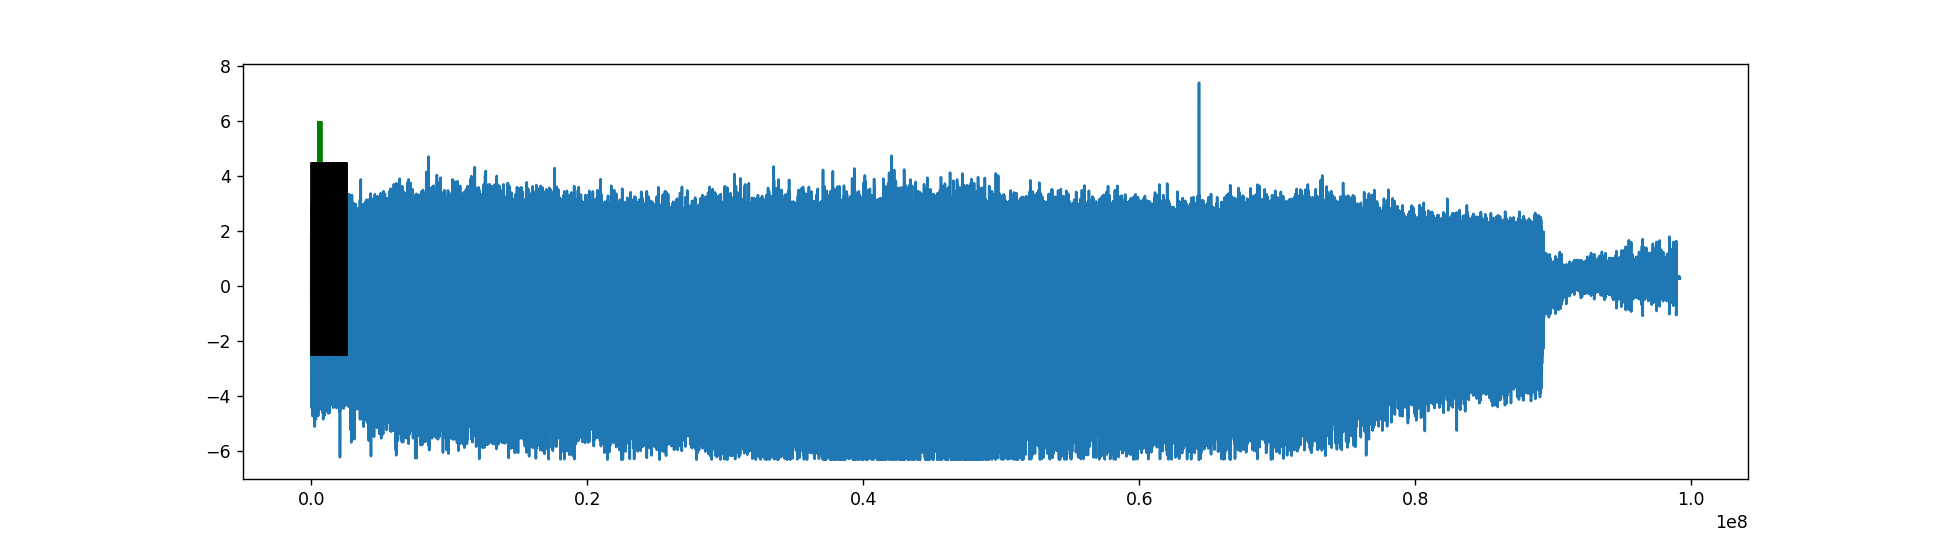

In [6]:
plt.figure()
plt.plot(voltage)

In [19]:
(43700)/(voltage.size/50000.0)

22.032881731524345

In [7]:
import gc
source_path = '../data/david_neurons'
for root, dirnames, filenames in os.walk(source_path):
    for filename in filenames:
        if filename.endswith('pkl'):
            gc.collect()
            try:
                with open(os.path.join(root,filename), 'rb') as input:
                    sss = pickle.load(input)
                    print(sss.cs_indices.shape)
            except EOFError as error:
                print(repr(error))
                
#             print(os.path.join(root,filename))
#             changed = False
#             while sss.cs_indices.size > 2.5*(sss.voltage.size*sss.dt): # if more than 2.5 Hz, increase gmm components
#                 print(sss.cs_indices.shape)
#                 sss.cs_num_gmm_components = sss.cs_num_gmm_components + 1
#                 sss._cluster_spike_by_feature()
#                 sss._cs_post_process()
#                 print(sss.cs_indices.shape)
#                 gc.collect()
#                 changed = True
#             if changed:
#                 with open(os.path.join(root,filename), 'wb') as output:
#                     pickle.dump(sss, output, pickle.HIGHEST_PROTOCOL)



(6513,)
(3003,)
(960,)
(4169,)
(5852,)
(637,)
(5848,)
(1019,)
(4387,)
(1374,)
(2478,)
(5599,)
(1386,)
(3909,)
(1841,)
(505,)
(9158,)
(2302,)
(1088,)
(1823,)
(1933,)
(1644,)
(2249,)
(1221,)
(945,)
(8655,)
(904,)
(420,)
(418,)
(449,)
(1353,)
(3367,)
(3622,)
(631,)
(840,)
(2584,)
(727,)
(2861,)
(317,)
(1265,)
(759,)
(2879,)
(930,)
(6266,)
(825,)
(4762,)
(6152,)
(9278,)
(5471,)
(572,)
(1113,)
(445,)
(3589,)
(1052,)
(10743,)
(1287,)
(935,)
(3381,)
(139,)
(848,)
(1230,)
(2062,)
(1318,)
(1068,)
(921,)
(323,)
(1049,)
(848,)
(1931,)
(1162,)
(871,)
(358,)
(635,)
(1547,)
(139,)
(754,)
EOFError()
(937,)
(3677,)
(1610,)
(1688,)
(2355,)
(630,)
(1279,)
(528,)
(1313,)
(3194,)
(1521,)
(2366,)
(539,)
(3033,)
(2340,)
(1857,)
(541,)
(1028,)
(1640,)
EOFError()
(1276,)
(2209,)
(1820,)
(800,)
(1366,)
(2256,)
(3688,)
(784,)
(696,)
(6285,)
(4222,)
(1966,)
(3141,)
(2047,)
(655,)
(3598,)
(1278,)
(2224,)
(2068,)
(780,)
(2359,)
(1507,)
(393,)
(3162,)
(4148,)
(8027,)
(1304,)
(9627,)
(3767,)
(431,)
(2143,)
(3524,)
(

In [9]:
2.5*(sss.voltage.size*sss.dt)


9569.338499999998

In [5]:
sss.voltage.size*sss.dt

3827.7353999999996

In [ ]:
os.path.join(root,filename + '.pkl')

In [7]:
from sklearn.mixture import GaussianMixture

features = sss._extract_features()
sss.cs_num_gmm_components = 3
sss.cs_cov_type = 'full'
gmm = GaussianMixture(sss.cs_num_gmm_components, covariance_type = sss.cs_cov_type, random_state=0).fit(features)
cluster_labels = gmm.predict(features)
#cluster_labels = cluster_labels.reshape(features.shape)

cs_indices = sss.get_spike_indices()[cluster_labels == np.argmax(np.mean(gmm.means_, axis=1))]
sss.cs_indices = cs_indices


In [8]:
features.shape

(144424, 10)

In [9]:
cs_indices.shape

(2879,)

In [11]:
freq_pca = sss._extract_features()

In [12]:
freq_pca.shape

(34523, 5)

In [16]:
sss.cs_indices.shape

(0,)

In [14]:
cs_indices_test = np.array([])
for i in [2]:
    cs_indices_test = np.union1d(cs_indices_test, np.array(seg.spiketrains[i]))

cs_indices_test = np.int32(cs_indices_test/dt)
print(cs_indices_test.shape)

(2801,)


In [9]:
voltage.size*dt/60.0


63.79558999999999

<IPython.core.display.Javascript object>


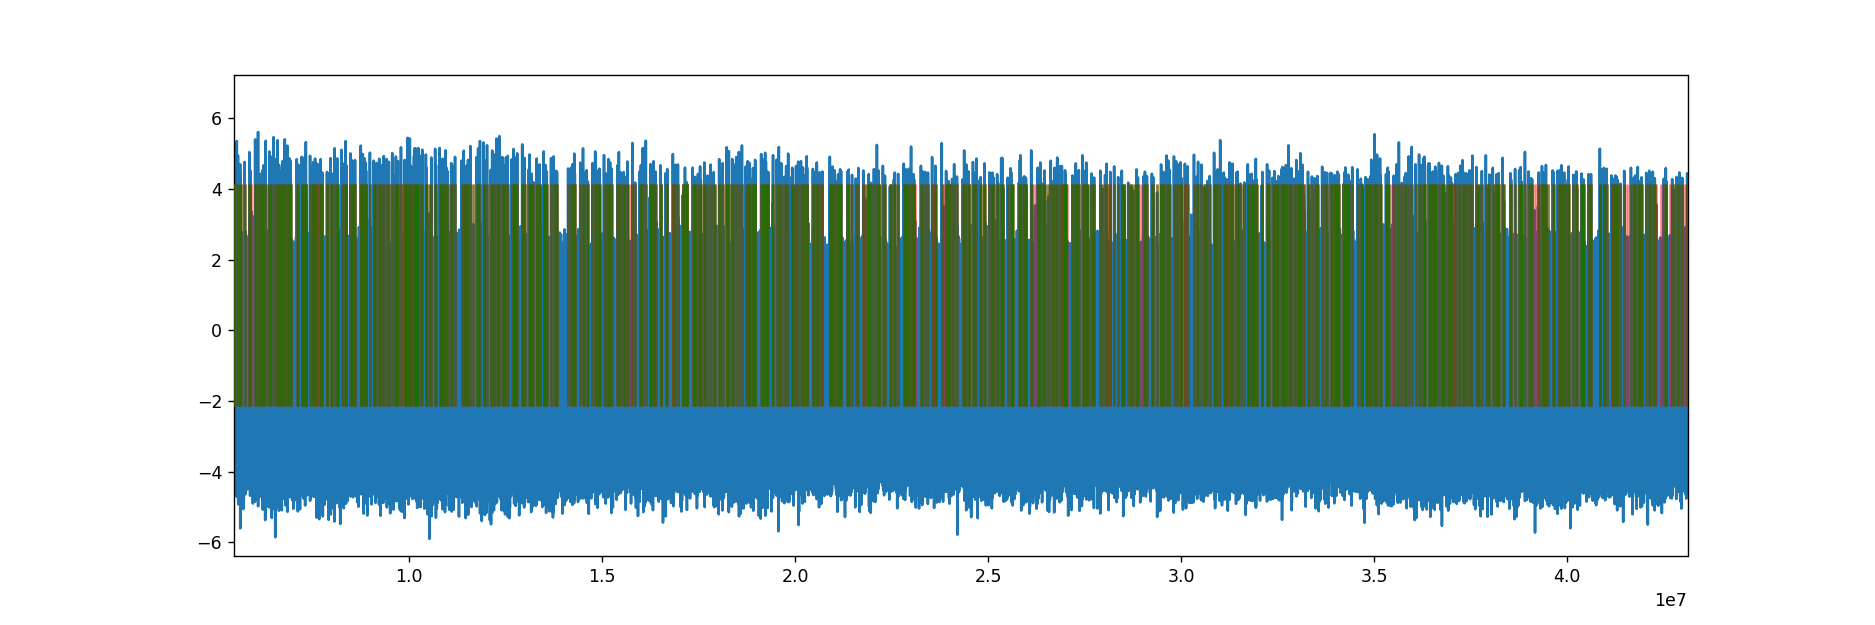

In [16]:
plt.figure(figsize=(15,5))
plt.plot(sss.voltage)
plt.eventplot(sss.get_cs_spike_indices(), linelengths=np.max(sss.voltage), colors='r' ,zorder=10, alpha = 0.5)
plt.eventplot(cs_indices_test, linelengths=np.max(sss.voltage), colors='g' ,zorder=10, alpha = 0.5)
plt.show()